# <b>作業要求</b>
### 1. 延用上週爬取的股價資料
### 2. 計算技術指標（SMA、RSI、MACD）
### 3. 可視化 K 線圖
### 4. 使用技術指標結合機器學習（線性回歸、決策樹、隨機森林）預測股價漲跌。技術指標作為特徵來預測第 n 天的股價

# <b>取得股價資料</b>

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

In [3]:
# 輸入股票代號
stock_id = input("請輸入股票代號: ")+ ".TW"

'''今天往前算幾天'''
# 計算起始日期和結束日期（今天的日期和12個月前的日期）
end_date = dt.date.today()
start_date = end_date - dt.timedelta(days=365)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間\
df = yf.download(stock_id, start=start_date, end=end_date).reset_index()

df

請輸入股票代號: 2330


[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-10-03,528.0,533.0,528.0,529.0,519.470459,14490129
1,2023-10-04,521.0,523.0,519.0,520.0,510.632568,28358964
2,2023-10-05,523.0,529.0,523.0,528.0,518.488464,24945684
3,2023-10-06,530.0,533.0,529.0,532.0,522.416443,15336587
4,2023-10-11,542.0,544.0,540.0,544.0,534.200195,46639969
...,...,...,...,...,...,...,...
238,2024-09-25,1000.0,1005.0,998.0,1005.0,1005.000000,39405222
239,2024-09-26,1010.0,1015.0,1005.0,1015.0,1015.000000,38321585
240,2024-09-27,1020.0,1025.0,1000.0,1000.0,1000.000000,35783779
241,2024-09-30,978.0,990.0,957.0,957.0,957.000000,61603217


# <b>1. 技術指標的計算</b>
移動動平均線（MA）、相對強弱指數（RSI）、平滑異同移動平均線（MACD）


## 1.1 計算簡單移動平均線（SMA）

長線交易的投資人，週期就會採用更大的時區，如日K線或週K線，搭配上20MA或60MA。

In [4]:
# 計算8日 SMA
df['8_SMA'] = df['Close'].rolling(window=8).mean()

# 計算13日 SMA
df['13_SMA'] = df['Close'].rolling(window=13).mean()

# 計算20日 SMA
df['20_SMA'] = df['Close'].rolling(window=20).mean()

# 計算60日 SMA
df['60_SMA'] = df['Close'].rolling(window=60).mean()

# 列印最後10筆筆數
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,60_SMA
233,2024-09-18,945.0,948.0,933.0,941.0,941.0,28424324,924.625,924.615385,933.85,956.000000
234,2024-09-19,940.0,960.0,936.0,960.0,960.0,32739630,929.875,925.846154,933.95,956.333333
235,2024-09-20,981.0,982.0,971.0,973.0,973.0,60133709,939.125,927.769231,935.05,956.800000
236,2024-09-23,971.0,977.0,971.0,977.0,977.0,14497067,948.250,930.615385,936.45,957.083333
237,2024-09-24,976.0,987.0,971.0,987.0,987.0,26785975,959.000,938.153846,938.30,957.533333
238,2024-09-25,1000.0,1005.0,998.0,1005.0,1005.0,39405222,967.125,946.076923,941.45,958.183333
239,2024-09-26,1010.0,1015.0,1005.0,1015.0,1015.0,38321585,975.625,953.538462,944.00,958.966667
240,2024-09-27,1020.0,1025.0,1000.0,1000.0,1000.0,35783779,982.250,961.307692,946.85,959.633333
241,2024-09-30,978.0,990.0,957.0,957.0,957.0,61603217,984.250,965.384615,947.50,959.266667
242,2024-10-01,967.0,977.0,967.0,972.0,972.0,26760355,985.750,970.846154,948.70,958.716667


## 1.2 計算相對強弱指數（RSI）

大於 70 可能代表被超買，有機率回調
小於 30 可能代表被超賣，有機率回升

<img src="https://images.stockfeel.com.tw/stockfeelimage/2015/10/%E6%95%99%E4%BD%A0%E7%9C%8B%E6%87%82-RSI-%E7%9B%B8%E5%B0%8D%E5%BC%B7%E5%BC%B1%E6%8C%87%E6%A8%99-01.jpg" alt="rsi" width="500"/>

<img src="https://images.stockfeel.com.tw/stockfeelimage/2015/10/%E6%95%99%E4%BD%A0%E7%9C%8B%E6%87%82-RSI-%E7%9B%B8%E5%B0%8D%E5%BC%B7%E5%BC%B1%E6%8C%87%E6%A8%99-02.jpg" alt="rs" width="500"/>

In [5]:
# 計算每個交易日的價格變動，即當天收盤價與前一天收盤價的差異
df['Change'] = df['Close'] - df['Close'].shift(1)

# 將變動值中的正數部分視為“Gain”（增益），如果變動為負則記為0
df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)

# 將變動值中的負數部分視為“Loss”（損失），取其絕對值，如果變動為正則記為0
df['Loss'] = df['Change'].apply(lambda x: abs(x) if x < 0 else 0)

df.tail(10)




,Date,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,60_SMA,Change,Gain,Loss
233,2024-09-18,945.0,948.0,933.0,941.0,941.0,28424324,924.625,924.615385,933.85,956.000000,-6.0,0.0,6.0
234,2024-09-19,940.0,960.0,936.0,960.0,960.0,32739630,929.875,925.846154,933.95,956.333333,19.0,19.0,0.0
235,2024-09-20,981.0,982.0,971.0,973.0,973.0,60133709,939.125,927.769231,935.05,956.800000,13.0,13.0,0.0
236,2024-09-23,971.0,977.0,971.0,977.0,977.0,14497067,948.250,930.615385,936.45,957.083333,4.0,4.0,0.0
237,2024-09-24,976.0,987.0,971.0,987.0,987.0,26785975,959.000,938.153846,938.30,957.533333,10.0,10.0,0.0
238,2024-09-25,1000.0,1005.0,998.0,1005.0,1005.0,39405222,967.125,946.076923,941.45,958.183333,18.0,18.0,0.0
239,2024-09-26,1010.0,1015.0,1005.0,1015.0,1015.0,38321585,975.625,953.538462,944.00,958.966667,10.0,10.0,0.0
240,2024-09-27,1020.0,1025.0,1000.0,1000.0,1000.0,35783779,982.250,961.307692,946.85,959.633333,-15.0,0.0,15.0
241,2024-09-30,978.0,990.0,957.0,957.0,957.0,61603217,984.250,965.384615,947.50,959.266667,-43.0,0.0,43.0
242,2024-10-01,967.0,977.0,967.0,972.0,972.0,26760355,985.750,970.846154,948.70,958.716667,15.0,15.0,0.0


In [6]:
# 計算過去14個交易日的平均增益
df['Avg Gain'] = df['Gain'].rolling(window=14).mean()

# 計算過去14個交易日的平均損失
df['Avg Loss'] = df['Loss'].rolling(window=14).mean()

# 計算相對強弱指數的相對強度（RS），即平均增益與平均損失的比值
df['RS'] = df['Avg Gain'] / df['Avg Loss']

# 計算相對強弱指數（RSI），使用RS公式計算出來
df['RSI'] = 100 - (100 / (1 + df['RS']))

# 顯示最後幾行的數據
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,60_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI
233,2024-09-18,945.0,948.0,933.0,941.0,941.0,28424324,924.625,924.615385,933.85,956.000000,-6.0,0.0,6.0,6.071429,7.714286,0.787037,44.041451
234,2024-09-19,940.0,960.0,936.0,960.0,960.0,32739630,929.875,925.846154,933.95,956.333333,19.0,19.0,0.0,7.428571,6.214286,1.195402,54.450262
235,2024-09-20,981.0,982.0,971.0,973.0,973.0,60133709,939.125,927.769231,935.05,956.800000,13.0,13.0,0.0,8.285714,6.214286,1.333333,57.142857
236,2024-09-23,971.0,977.0,971.0,977.0,977.0,14497067,948.250,930.615385,936.45,957.083333,4.0,4.0,0.0,8.285714,6.214286,1.333333,57.142857
237,2024-09-24,976.0,987.0,971.0,987.0,987.0,26785975,959.000,938.153846,938.30,957.533333,10.0,10.0,0.0,9.000000,5.642857,1.594937,61.463415
238,2024-09-25,1000.0,1005.0,998.0,1005.0,1005.0,39405222,967.125,946.076923,941.45,958.183333,18.0,18.0,0.0,10.285714,2.000000,5.142857,83.720930
239,2024-09-26,1010.0,1015.0,1005.0,1015.0,1015.0,38321585,975.625,953.538462,944.00,958.966667,10.0,10.0,0.0,10.071429,2.000000,5.035714,83.431953
240,2024-09-27,1020.0,1025.0,1000.0,1000.0,1000.0,35783779,982.250,961.307692,946.85,959.633333,-15.0,0.0,15.0,8.928571,3.071429,2.906977,74.404762
241,2024-09-30,978.0,990.0,957.0,957.0,957.0,61603217,984.250,965.384615,947.50,959.266667,-43.0,0.0,43.0,8.928571,4.785714,1.865672,65.104167
242,2024-10-01,967.0,977.0,967.0,972.0,972.0,26760355,985.750,970.846154,948.70,958.716667,15.0,15.0,0.0,9.642857,4.785714,2.014925,66.831683


## 1.3 計算平滑異同移動平均線（MACD）

通常使用12日和26日的EMA

正轉負-> 代表短期趨勢已經從強轉弱
負轉正-> 代表短期趨勢從弱轉強

In [7]:
'''
第一日
# 平滑係數公式： α = 2 / (span + 1) = 2 / (span + 1)
# α = 2 / (8 + 1) = 2 / (8 + 1) ≈ 0.2222
# 0.2222 * 770.0 + (1-0.2222) * 776.0 = 171.094 + 603.5728 = 774.6668
'''
'''
# 計算12天的指數移動平均線（EMA），並將其存儲在 'EMA_12' 列中
# adjust=False 表示在計算 EMA 時，只考慮當前值和前一個 EMA 的遞歸計算方式，而不考慮所有歷史數據
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()

# 計算26天的指數移動平均線（EMA），並將其存儲在 'EMA_13' 列中
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()

# 計算MACD線：8天EMA減去13天EMA，並將其存儲在 'MACD' 列中
df['MACD'] = df['EMA_12'] - df['EMA_26']
'''
df['EMA_8'] = df['Close'].ewm(span=8, adjust=False).mean()

# 計算13天的指數移動平均線（EMA），並將其存儲在 'EMA_13' 列中
df['EMA_13'] = df['Close'].ewm(span=13, adjust=False).mean()

# 計算MACD線：8天EMA減去13天EMA，並將其存儲在 'MACD' 列中
df['MACD'] = df['EMA_8'] - df['EMA_13']

# 查看資料最開始的三個值 ，因在計算 EMA 的遞歸計算需要時間穩定
df.head(3)


,Date,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,...,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD
0,2023-10-03,528.0,533.0,528.0,529.0,519.470459,14490129,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,529.000000,529.000000,0.000000
1,2023-10-04,521.0,523.0,519.0,520.0,510.632568,28358964,NaN,NaN,NaN,...,-9.0,0.0,9.0,NaN,NaN,NaN,NaN,527.000000,527.714286,-0.714286
2,2023-10-05,523.0,529.0,523.0,528.0,518.488464,24945684,NaN,NaN,NaN,...,8.0,8.0,0.0,NaN,NaN,NaN,NaN,527.222222,527.755102,-0.532880


# <b>2. 資料可視化</b>
K 線型態的捕捉

## 2.1 可視化收盤價折線圖

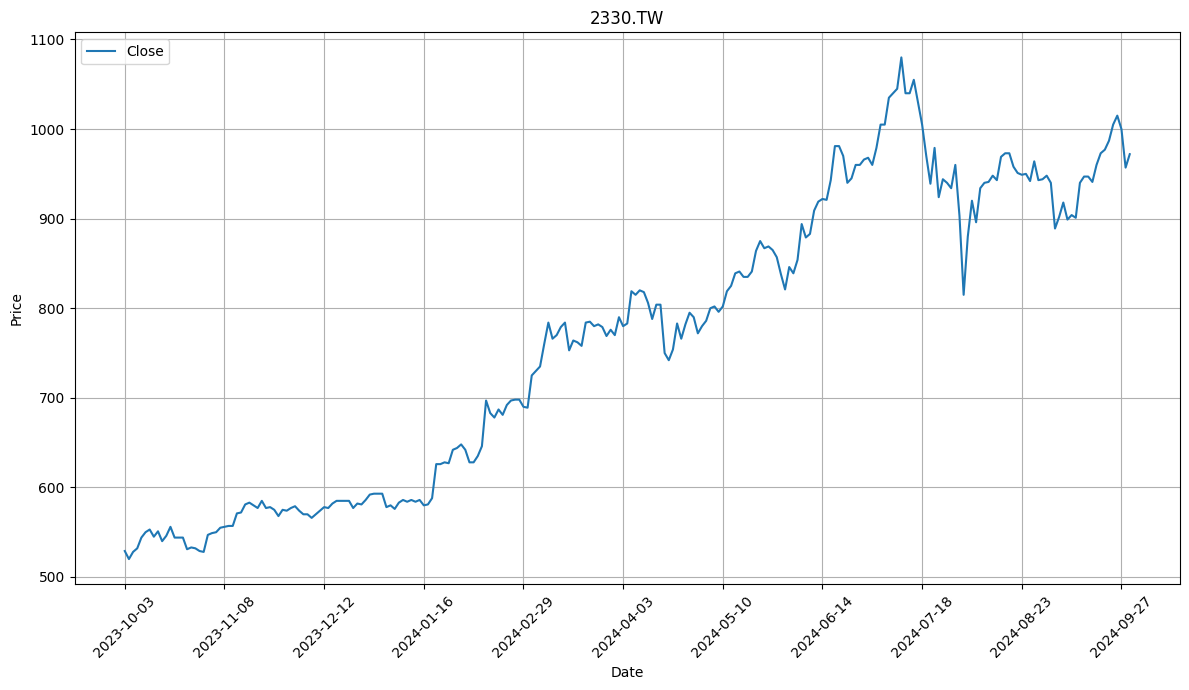

In [8]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

## 2.2 加入技術指標

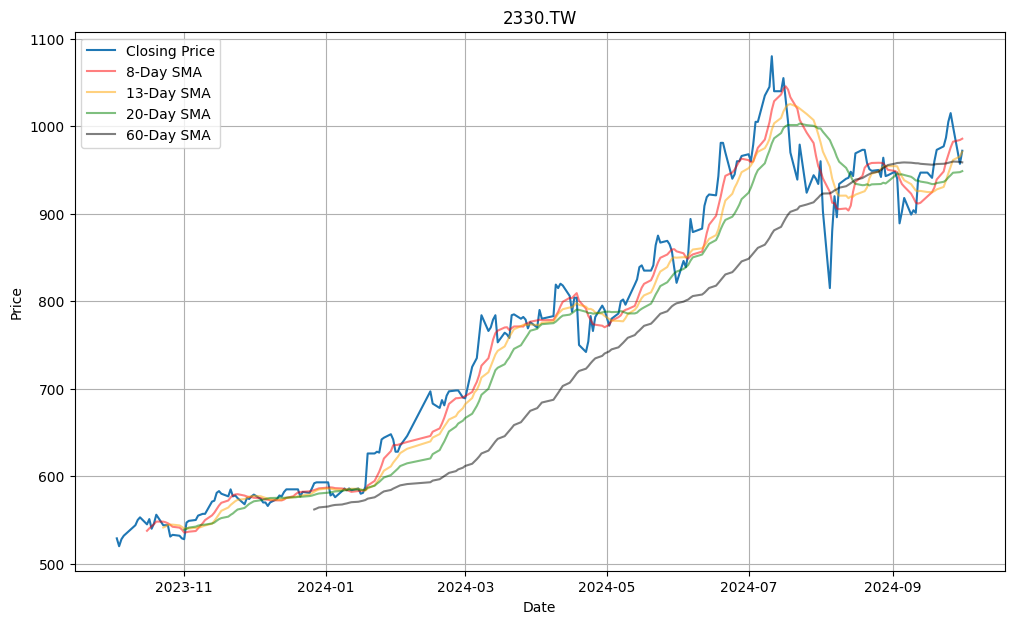

In [9]:
# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Date'], df['Close'], label='Closing Price')

# 8 天的 SMA
plt.plot(df['Date'], df['8_SMA'], label='8-Day SMA', color='red', alpha=.5)

# 13 天的 SMA
plt.plot(df['Date'], df['13_SMA'], label='13-Day SMA', color='orange', alpha=.5)

# 20 天的 SMA
plt.plot(df['Date'], df['20_SMA'], label='20-Day SMA', color='green', alpha=.5)

# 60 天的 SMA
plt.plot(df['Date'], df['60_SMA'], label='60-Day SMA', color='black', alpha=.5)

# 將股票代號設為圖標
plt.title(f'{stock_id}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

## 2.3 K 線

In [10]:
!pip install mplfinance

In [11]:
# 將原始的 dataframe 再建立一個出來
kplot_df = df.set_index('Date')
kplot_df['2024-8-01':'2024-09-18'].tail()

,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,60_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD
Date,,,,,,,,,,,,,,,,,,,,
2024-09-11,906.0,906.0,900.0,901.0,897.0,18029342,912.625,926.461538,938.00,957.666667,-3.0,0.0,3.0,4.428571,8.000000,0.553571,35.632184,912.528220,920.382034,-7.853815
2024-09-12,936.0,944.0,928.0,940.0,940.0,39454846,911.625,925.692308,937.85,957.616667,39.0,39.0,0.0,7.214286,7.857143,0.918182,47.867299,918.633060,923.184601,-4.551541
2024-09-13,955.0,955.0,939.0,947.0,947.0,25347586,912.500,926.076923,936.75,957.050000,7.0,7.0,0.0,7.642857,7.857143,0.972727,49.308756,924.936824,926.586801,-1.649976
2024-09-16,952.0,952.0,943.0,947.0,947.0,13626239,919.750,924.769231,935.45,956.483333,0.0,0.0,0.0,7.642857,7.285714,1.049020,51.196172,929.839752,929.502972,0.336780
2024-09-18,945.0,948.0,933.0,941.0,941.0,28424324,924.625,924.615385,933.85,956.000000,-6.0,0.0,6.0,6.071429,7.714286,0.787037,44.041451,932.319807,931.145405,1.174403


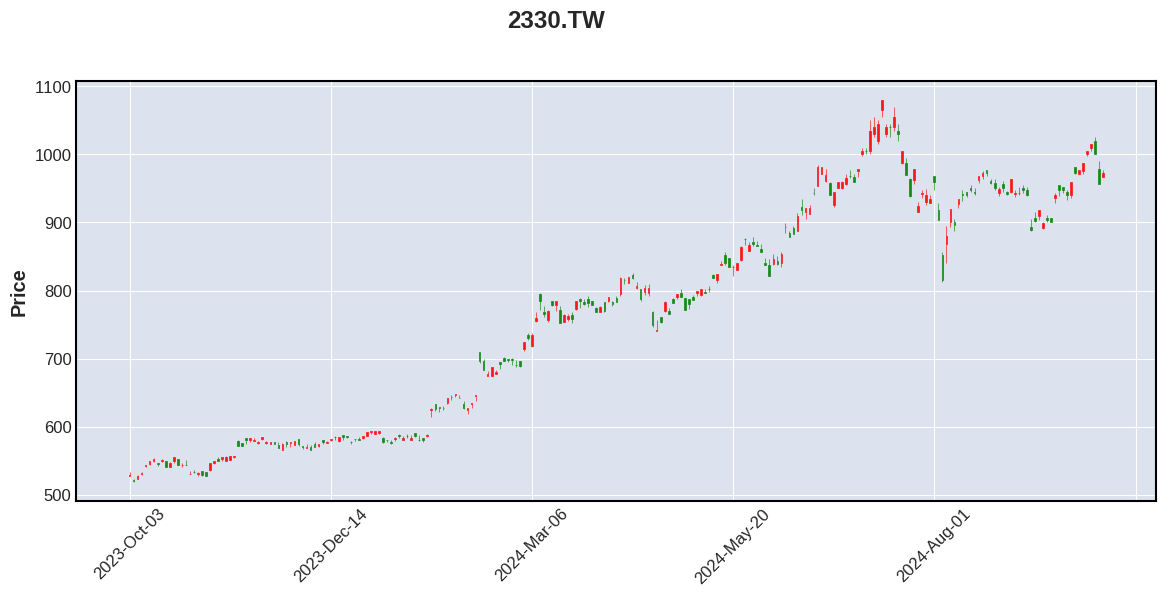

In [12]:
import mplfinance as mpf
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)

# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))

## 2.4 捕捉 Hammer 型態

錘形線（Hammer）

<img src="https://drive.google.com/uc?id=1M5t0g5kKCm2xfzRaFHfKt_CT41XSRjgb" alt="drawing" width="600"/>

In [13]:
# 計算 K 線長度 = abs(收盤-開盤)
df['body_length'] = abs(df['Close'] - df['Open'])

# 計算下影線長度 = abs(最高-最小)
df['lower_shadow'] = abs(df['Low'] - df[['Open', 'Close']].min(axis=1))

# 計算上影線長度 = abs(最高-最小)
df['upper_shadow'] = abs(df['High'] - df[['Open', 'Close']].max(axis=1))

# 定義 Hammer 型態的條件
hammer_condition = (
    (df['lower_shadow'] > 2 * df['body_length']) &  # 下影線長於實體的两倍
    (df['upper_shadow'] < df['body_length'] * 0.1) &  # 上影線很短
    (df['body_length'] < (df['High'] - df['Low']) * 0.4)  # 實體相對較小
)

# 提取 Hammer 型態
hammer_df = df[hammer_condition]
hammer_df.set_index('Date', inplace=True)

hammer_df

,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,60_SMA,...,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2023-11-15,583.0,583.0,575.0,581.0,570.533691,50305088,562.375,552.615385,549.10,NaN,...,3.928571,0.357143,11.000000,91.666667,564.070385,558.078639,5.991746,2.0,6.0,0.0
2023-11-30,576.0,577.0,570.0,577.0,566.605774,47192647,576.125,577.076923,569.85,NaN,...,3.214286,1.785714,1.800000,64.285714,574.841073,572.732271,2.108801,1.0,6.0,0.0
2023-12-28,592.0,593.0,589.0,593.0,585.361023,25514849,585.125,583.692308,579.55,563.083333,...,2.357143,0.714286,3.300000,76.744186,586.211542,583.754311,2.457230,1.0,3.0,0.0
2024-01-23,629.0,629.0,622.0,628.0,619.910156,41072439,599.875,593.384615,591.45,577.500000,...,4.571429,1.000000,4.571429,82.051282,606.736599,599.795171,6.941428,1.0,6.0,0.0
2024-02-02,633.0,635.0,628.0,635.0,626.820007,26334815,636.750,626.384615,611.60,589.550000,...,5.428571,1.928571,2.814815,73.786408,631.460693,625.386109,6.074584,2.0,5.0,0.0
2024-02-22,695.0,695.0,685.0,692.0,683.085754,33145643,674.875,660.692308,645.35,601.933333,...,7.857143,3.214286,2.444444,70.967742,674.860393,663.256082,11.604310,3.0,7.0,0.0
2024-07-03,976.0,979.0,967.0,979.0,974.653687,24070411,959.750,959.538462,936.70,854.733333,...,7.857143,3.571429,2.200000,68.750000,962.391306,952.063452,10.327854,3.0,9.0,0.0


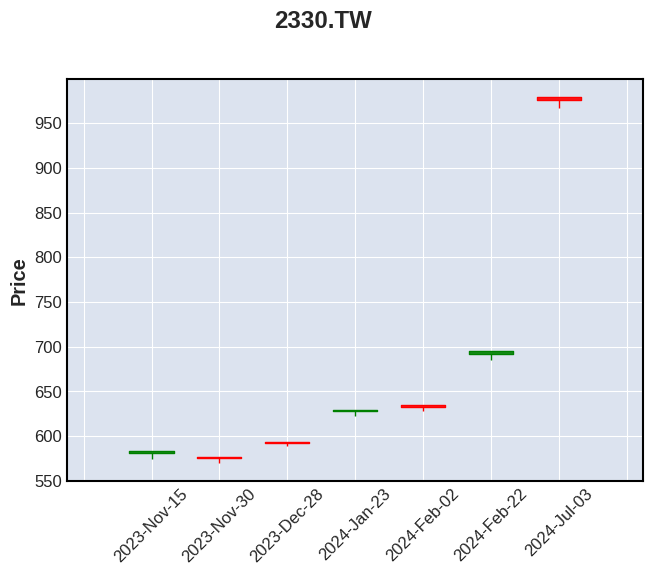

In [14]:
mpf.plot(hammer_df, type='candle', style=my_style, title=f'{stock_id}')

## 2.5 捕捉 Doji 型態

十字線（Doji）

<img src="https://drive.google.com/uc?id=1BDfcn8ZmMVgl0Xlku7mSD338WHeffrgc" alt="drawing" width="600"/>

In [15]:
# 計算 K 線長度
df['body_length'] = abs(df['Close'] - df['Open'])

# 定義Doji型態的條件
# 一般來說，body 長度 如果 小於等於 (最高價-最低價) * 0.1
doji_condition = (
    df['body_length'] <= (df['High'] - df['Low']) * 0.1  # 中間區域非常小
)

# 提取Doji形态
doji_df = df[doji_condition]
doji_df.set_index('Date', inplace=True)

doji_df

,Open,High,Low,Close,Adj Close,Volume,8_SMA,13_SMA,20_SMA,60_SMA,...,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-25,544.0,551.0,544.0,544.0,534.200195,16526355,546.250,544.384615,NaN,NaN,...,3.928571,2.857143,1.375000,57.894737,544.963404,543.133855,1.829549,0.0,0.0,7.0
2023-12-15,585.0,586.0,580.0,585.0,577.464111,54323262,575.250,575.076923,575.55,NaN,...,2.285714,1.071429,2.133333,68.085106,577.873039,576.067707,1.805332,0.0,5.0,1.0
2023-12-21,577.0,579.0,575.0,577.0,569.567078,24923414,581.750,577.230769,576.30,NaN,...,1.428571,1.571429,0.909091,47.619048,580.614109,579.035714,1.578395,0.0,2.0,2.0
2023-12-22,582.0,582.0,579.0,582.0,574.502747,18690214,582.250,578.153846,576.65,NaN,...,1.785714,1.214286,1.470588,59.523810,580.922085,579.459183,1.462901,0.0,3.0,0.0
2024-01-04,580.0,581.0,577.0,580.0,572.528503,15309129,587.000,585.384615,582.10,566.750000,...,1.571429,1.714286,0.916667,47.826087,585.034280,584.315530,0.718750,0.0,3.0,1.0
2024-01-11,586.0,589.0,583.0,586.0,578.451233,23997409,583.250,585.461538,584.60,569.683333,...,2.214286,1.571429,1.409091,58.490566,584.252555,583.934763,0.317792,0.0,3.0,3.0
2024-01-19,625.0,627.0,614.0,626.0,617.935913,161106401,589.375,586.000000,586.90,574.350000,...,4.428571,2.071429,2.137931,68.131868,593.421725,589.943427,3.478297,1.0,11.0,1.0
2024-01-26,644.0,646.0,639.0,644.0,635.704041,41153025,620.250,606.307692,598.55,582.650000,...,5.142857,0.785714,6.545455,86.746988,623.836287,614.133402,9.702885,0.0,5.0,2.0
2024-01-30,642.0,647.0,642.0,642.0,633.729797,36161825,635.375,615.538462,603.75,585.833333,...,5.214286,1.071429,4.866667,82.954545,632.049112,622.261275,9.787837,0.0,0.0,5.0


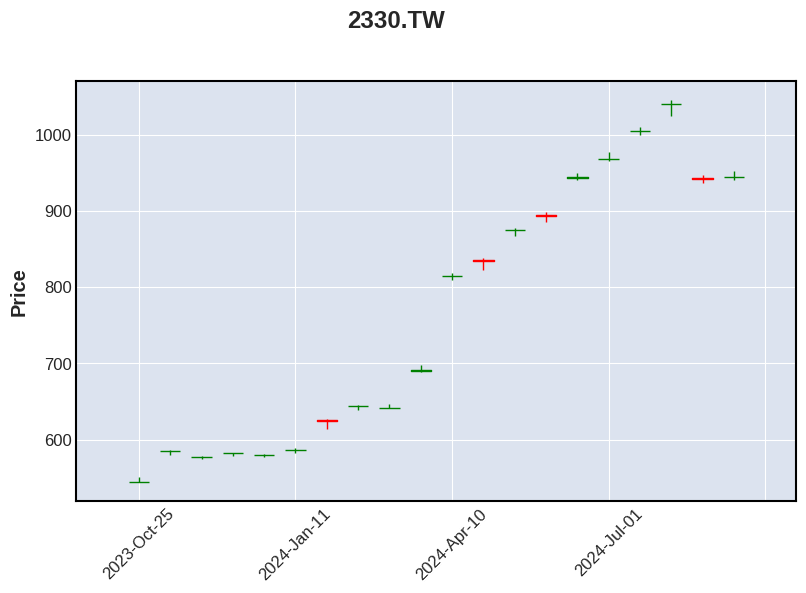

In [16]:
mpf.plot(doji_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(10, 6))

# <b>3. 機器學習預測股價漲跌</b>
技術指標當特徵，用線性回歸、決策樹、隨機森林預測股價漲跌

## 3.1 資料前處理

In [17]:
import numpy as np  # 引入 numpy，用於數據處理和數值運算
from sklearn.model_selection import train_test_split  # 引入 train_test_split，用於將數據集拆分為訓練集和測試集
from sklearn.metrics import mean_squared_error  # 引入 mean_squared_error 用於評估模型性能

In [18]:
# 標籤生成: 預測未來1天的價格，這裡以2024-04-01的技術指標 預測隔天的收盤價
n = 1
df['Future_Price'] = df['Close'].shift(-n)

# 去除缺失值
df.dropna(inplace=True)

# 使用特徵
X = df[['20_SMA', 'RSI', 'MACD']]

# 標籤（未來價格）
y = df['Future_Price']

X.shape, y.shape

((183, 3), (183,))

In [19]:
# 將數據集 X 和標籤 y 拆分為訓練集和測試集
# test_size=0.2 表示測試集佔全部數據的 20% --> 80% 的資料作為訓練，20% 的資料作為測試
# shuffle=False 表示在拆分數據時不打亂原始數據的順序
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 查看拆分後訓練集和測試集的形狀
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((146, 3), (37, 3), (146,), (37,))

## 3.2 線性回歸（Linear Regression）

In [20]:
# 引入線性回歸模型
from sklearn.linear_model import LinearRegression

# 建立並訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"線性回歸模型RMSE: {rmse:.2f}")

# 使用模型進行未來價格走勢預測
future_pred = model.predict(X[-1:])  # 使用最新的數據進行預測
print(f"線性回歸模型預測未來{n}天的價格: {future_pred[0]:.2f}")

線性回歸模型RMSE: 28.34
線性回歸模型預測未來1天的價格: 975.31


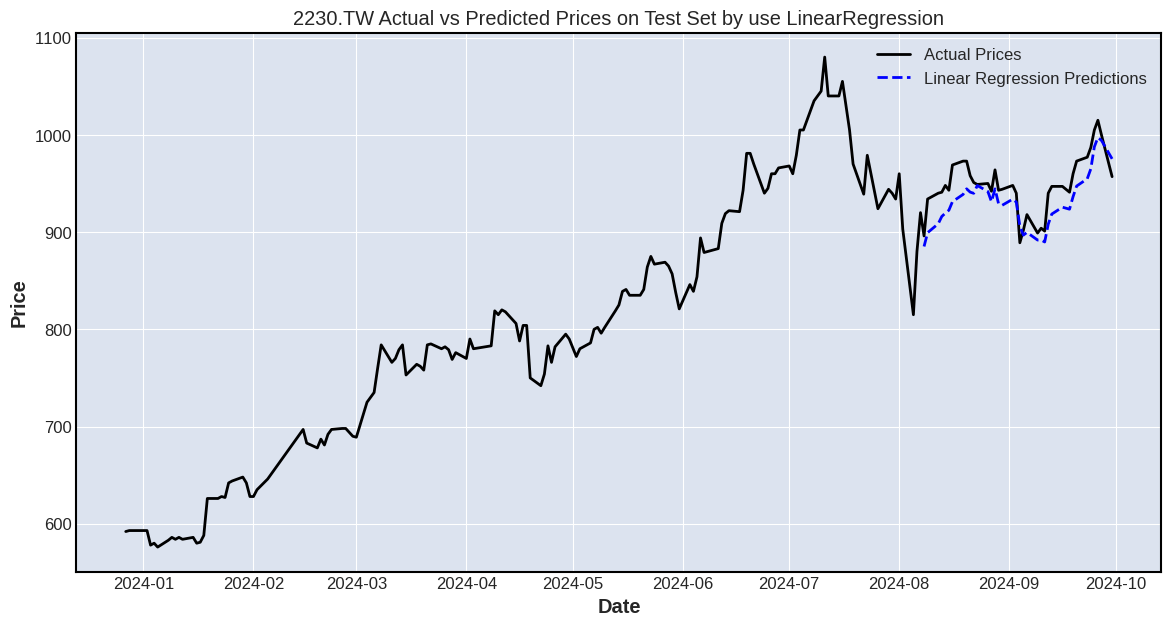

In [21]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Linear Regression Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW Actual vs Predicted Prices on Test Set by use LinearRegression')
plt.legend()
plt.grid(True)
plt.show()

## 3.2 決策樹（Decision Tree）

In [22]:
from sklearn.tree import DecisionTreeRegressor

# 建立並訓練決策數模型
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"決策樹模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"決策樹模型預測未來{n}天的價格: {future_pred[0]:.2f}")

決策樹模型RMSE: 53.24
決策樹模型預測未來1天的價格: 919.00


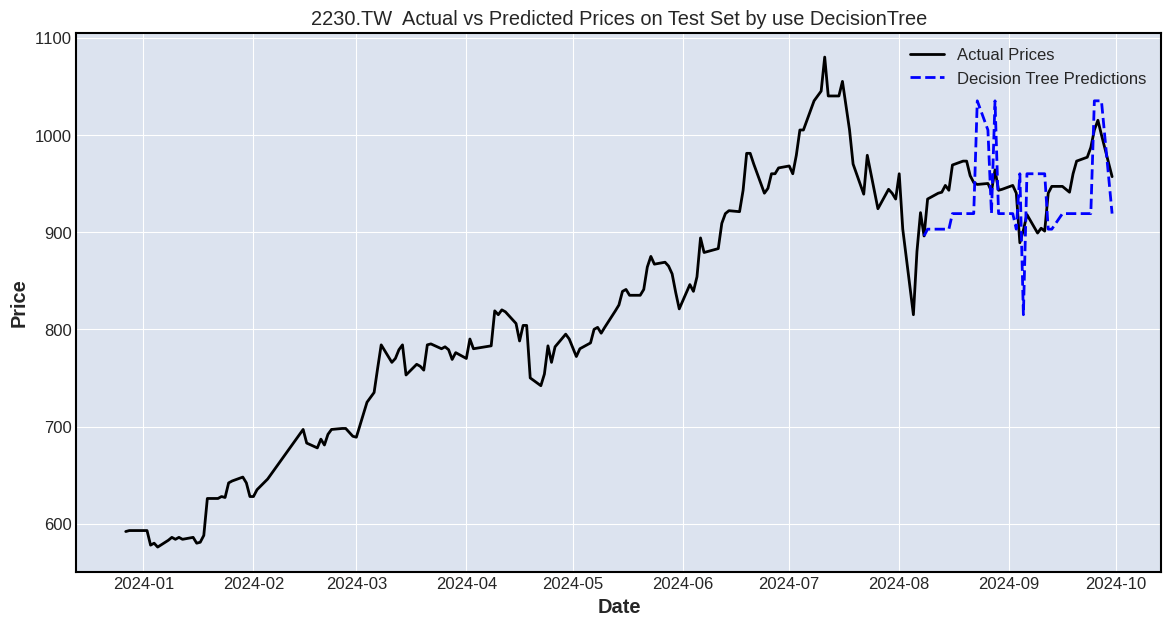

In [23]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Decision Tree Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW  Actual vs Predicted Prices on Test Set by use DecisionTree')
plt.legend()
plt.grid(True)
plt.show()

## 3.3 隨機森林（Random Forest）

In [24]:
# 引入隨機森林模型
from sklearn.ensemble import RandomForestRegressor

# 建立並訓練決策數模型
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"隨機森林模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"隨機森林模型預測未來{n}天的價格: {future_pred[0]:.2f}")

隨機森林模型RMSE: 36.35
隨機森林模型預測未來1天的價格: 948.40


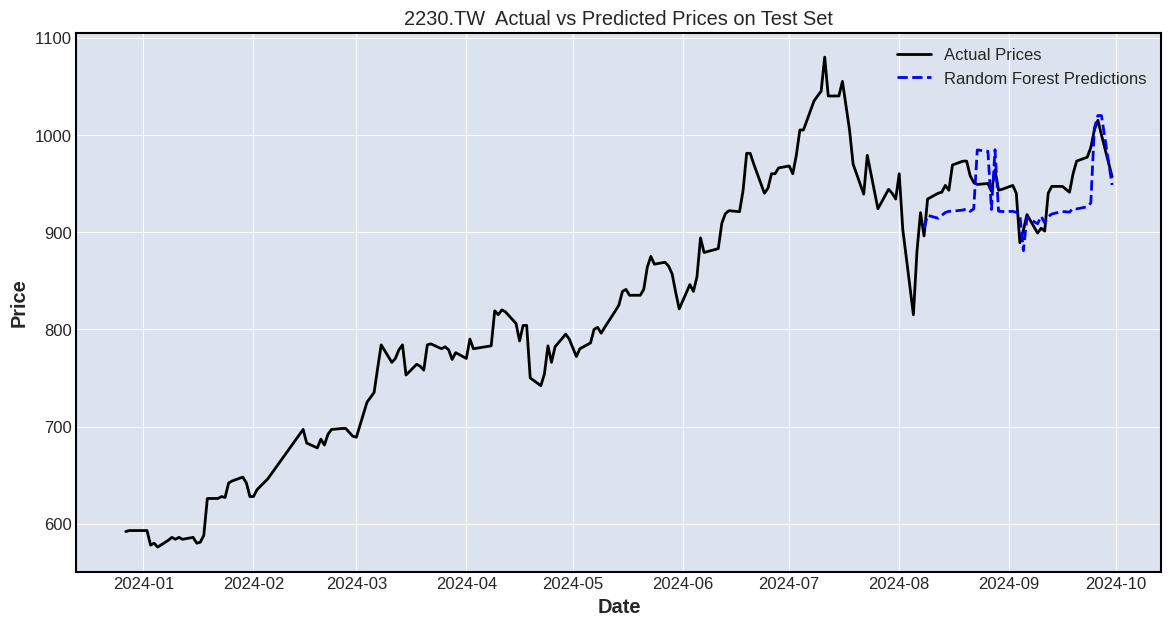

In [25]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Random Forest Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

3.4 XGBOOT

In [26]:
# 引入 XGBoost 模型
from xgboost import XGBRegressor
import numpy as np
from sklearn.metrics import mean_squared_error

# 建立並訓練 XGBoost 模型
model = XGBRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"XGBoost 模型 RMSE: {rmse:.2f}")

# 預測未來的價格
future_pred = model.predict(X[-1:])
print(f"XGBoost 模型預測未來 {n} 天的價格: {future_pred[0]:.2f}")

XGBoost 模型 RMSE: 23.68
XGBoost 模型預測未來 1 天的價格: 989.35


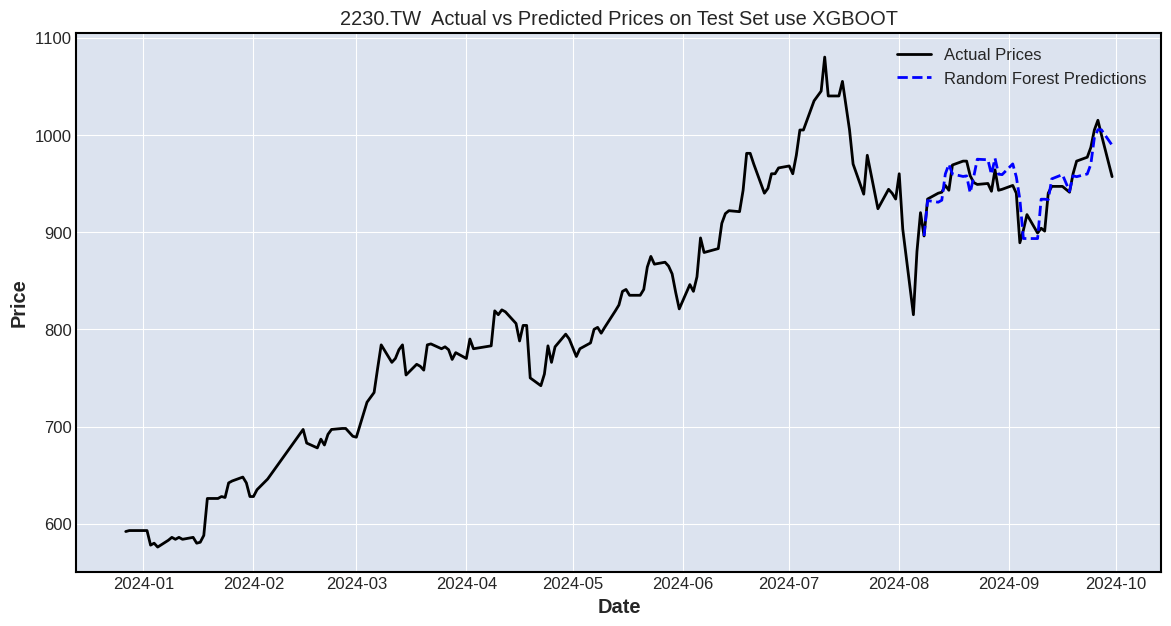

In [28]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Random Forest Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW  Actual vs Predicted Prices on Test Set use XGBOOT')
plt.legend()
plt.grid(True)
plt.show()